# Data Simluation

Using randomly sampled initial conditions (mM):
  S1: 0.6931
  S2: 2.0629
  S3: 0.1571
  S4: 0.2497
  S5: 0.1143
  S6: 0.5347
  S7: 0.0529

Simulation successful.
Obtained data for 1500 time points spanning from t=0.00 to t=5.00 minutes.
Shape of the time series data (time points, species): (1500, 7)


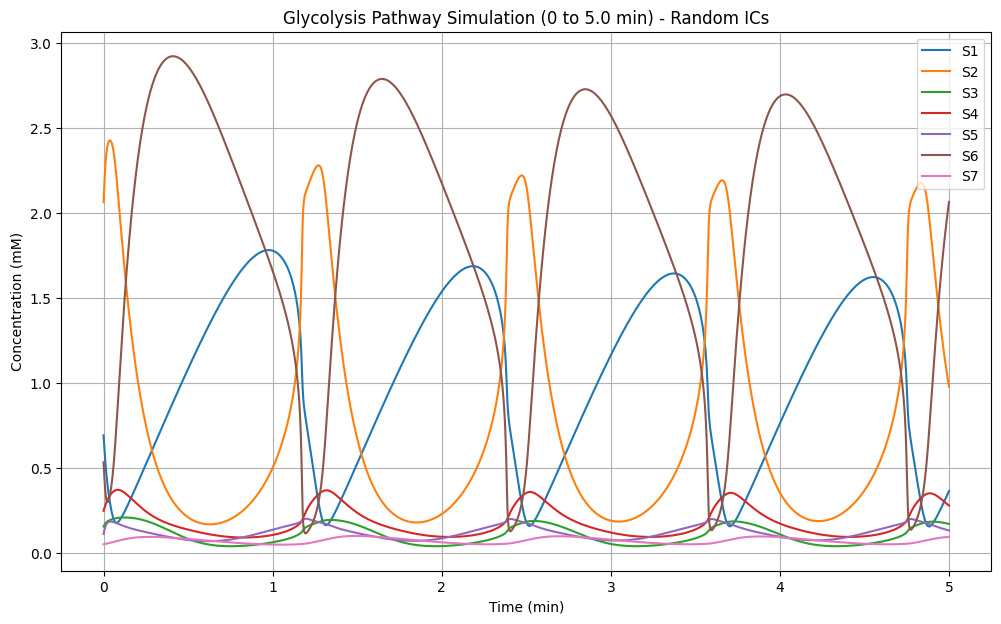

In [29]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

'''For reliably producing different initial conditions'''
np.random.seed(42)
# np.random.seed(420)
# np.random.seed(63)


def glycolysis_ode(t, y, J0, k1, k2, k3, k4, k5, k6, kappa, k, mu, N, A, K1, q):
    S1, S2, S3, S4, S5, S6, S7 = y

    v1 = (k1 * S1 * S6) / (1 + (S6 / K1)**q)
    v2 = k2 * S2 * (N - S5)
    v3 = k3 * S3 * (A - S6)
    v4 = k4 * S4 * S5
    v5 = k5 * S6
    v6 = k6 * S2 * S5
    v7 = kappa * (S4 - S7)
    v8 = k * S7

    dS1dt = J0 - v1
    dS2dt = 2 * v1 - v2 - v6
    dS3dt = v2 - v3
    dS4dt = v3 - v4 - v7
    dS5dt = v2 - v4 - v6
    dS6dt = -2 * v1 + 2 * v3 - v5
    dS7dt = mu * v7 - v8

    return [dS1dt, dS2dt, dS3dt, dS4dt, dS5dt, dS6dt, dS7dt]

parameters = {
    'J0': 2.5,      # Influx rate of S1 (mM min^-1)
    'k': 1.8,       # Rate constant for v8 (min^-1)
    'k1': 100.0,    # Rate constant for v1 (mM^-1 min^-1)
    'kappa': 13.0,  # Rate constant for v7 (min^-1)
    'k2': 6.0,      # Rate constant for v2 (mM^-1 min^-1)
    'q': 4,         # Hill coefficient for v1 (dimensionless)
    'k3': 16.0,     # Rate constant for v3 (mM^-1 min^-1)
    'K1': 0.52,     # Michaelis/activation constant for v1 (mM)
    'k4': 100.0,    # Rate constant for v4 (mM^-1 min^-1)
    'mu': 0.1,      # Scaling factor for v7 in dS7dt (dimensionless, assumes psi=mu)
    'k5': 1.28,     # Rate constant for v5 (min^-1)
    'N': 1.0,       # Total concentration related to S5 (mM)
    'k6': 12.0,     # Rate constant for v6 (mM^-1 min^-1)
    'A': 4.0        # Total concentration related to S6 (mM)
}

ic_ranges = {
    'S1': [0.15, 1.60],
    'S2': [0.19, 2.16],
    'S3': [0.04, 0.20],
    'S4': [0.10, 0.35],
    'S5': [0.08, 0.30],
    'S6': [0.14, 2.67],
    'S7': [0.05, 0.10]
}

initial_conditions = [
    np.random.uniform(low=ic_ranges['S1'][0], high=ic_ranges['S1'][1]),
    np.random.uniform(low=ic_ranges['S2'][0], high=ic_ranges['S2'][1]),
    np.random.uniform(low=ic_ranges['S3'][0], high=ic_ranges['S3'][1]),
    np.random.uniform(low=ic_ranges['S4'][0], high=ic_ranges['S4'][1]),
    np.random.uniform(low=ic_ranges['S5'][0], high=ic_ranges['S5'][1]),
    np.random.uniform(low=ic_ranges['S6'][0], high=ic_ranges['S6'][1]),
    np.random.uniform(low=ic_ranges['S7'][0], high=ic_ranges['S7'][1])
]

print(f"Using randomly sampled initial conditions (mM):")
for i, val in enumerate(initial_conditions):
    print(f"  S{i+1}: {val:.4f}")

T_final = 5.0 # in minutes
t_span = (0, T_final) 
num_points = 1500
t_eval = np.linspace(t_span[0], t_span[1], num_points) # Time points where the solution is computed


solution = solve_ivp(
    fun=glycolysis_ode,
    t_span=t_span,
    y0=initial_conditions,
    t_eval=t_eval,
    args=(parameters['J0'], parameters['k1'], parameters['k2'], parameters['k3'],
          parameters['k4'], parameters['k5'], parameters['k6'], parameters['kappa'],
          parameters['k'], parameters['mu'], parameters['N'], parameters['A'],
          parameters['K1'], parameters['q'])
)

if solution.success:
    print(f"\nSimulation successful.")
    print(f"Obtained data for {len(solution.t)} time points spanning from t={solution.t[0]:.2f} to t={solution.t[-1]:.2f} minutes.")

    time_series_data = solution.y.T

    print(f"Shape of the time series data (time points, species): {time_series_data.shape}")

    plt.figure(figsize=(12, 7))
    species_labels = [f'S{i+1}' for i in range(time_series_data.shape[1])]

    for i, label in enumerate(species_labels):
        plt.plot(solution.t, time_series_data[:, i], label=label)

    plt.xlabel('Time (min)')
    plt.ylabel('Concentration (mM)')
    plt.title(f'Glycolysis Pathway Simulation (0 to {T_final} min) - Random ICs')
    plt.legend() 
    plt.grid(True) 
    plt.show() 

else:
    print(f"\nSimulation failed: {solution.message}")

# E-DMD: Poly or RBF basis

Using simulation data shape: (1500, 7)
Split scaled data: Train shape (750, 7), Test shape (750, 7)

--- Model Configuration ---
  Basis Type: polynomial
  Poly Degree: 3

--- Fitting EDMD (polynomial) ---
Setting up PolynomialFeatures (degree=3)
Transforming data...
Lifted matrices created: Psi_X shape (749, 119), Psi_Y shape (749, 119)
Calculating Koopman operator K using regularization alpha=0.1...
K calculated using regularized least squares (lstsq). Rank=119
Koopman matrix K shape: (119, 119)
Fitting took 0.02 sec.
Predicting 749 steps forward starting from SCALED midpoint...
Predicting 749 steps...
Prediction took 0.07 sec.
Inverse transforming prediction...
Prediction complete. Final shape for plot: (750, 7)


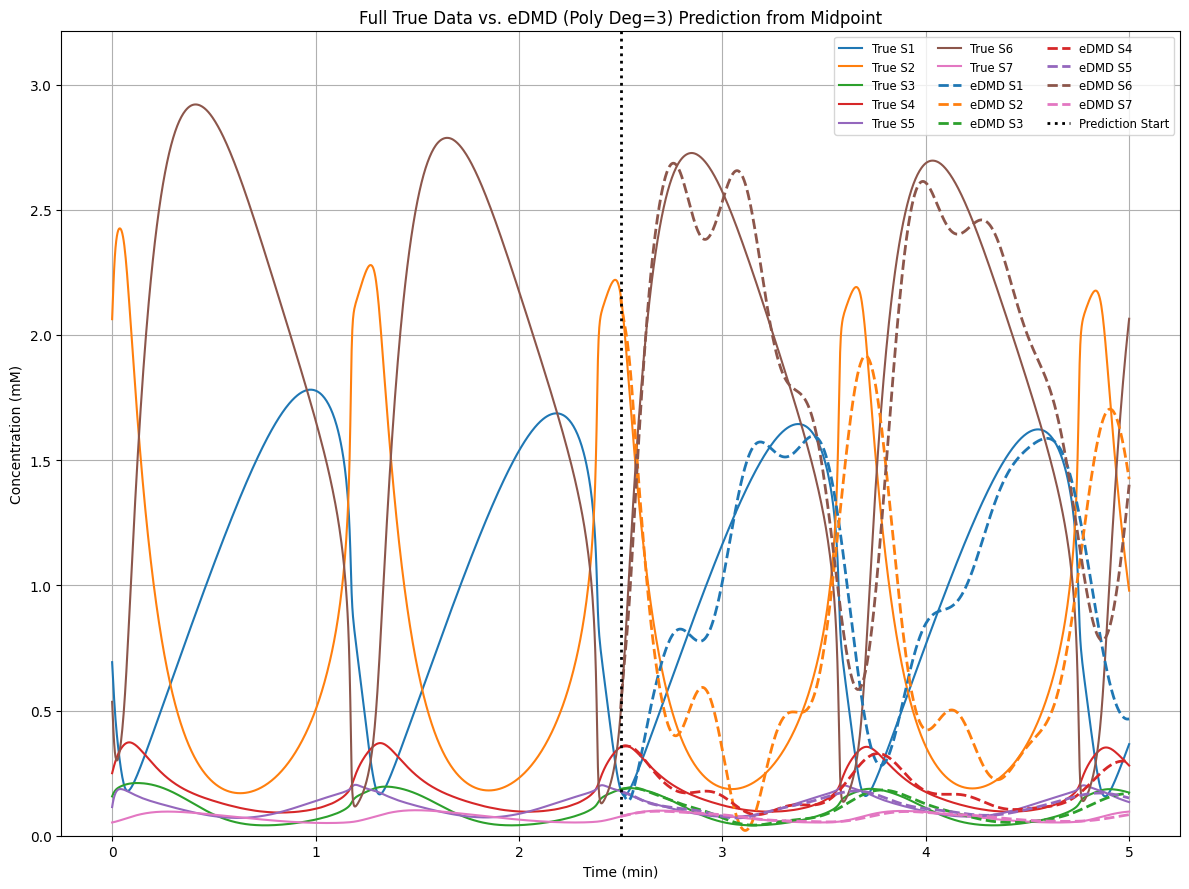

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.spatial.distance import cdist
from scipy.linalg import lstsq # needed for regularization


TRAIN_FRACTION = 0.5 

BASIS_TYPE = 'polynomial' # Options: 'polynomial', 'rbf'

POLY_DEGREE = 3

RBF_N_CENTERS = 100 
RBF_GAMMA = 1.0     # Kernel width parameter (for Gaussian)

# Regularization needs to be higher for higher order polynomials
REGULARIZATION_ALPHA = 1e-1 # 0 for pure pseudo-inverse, >0 for Ridge regularization

N_SPECIES_TO_PLOT = 7


class EDMD:

    def __init__(self, basis_type='polynomial', poly_degree=2, rbf_n_centers=50, rbf_gamma=1.0):

        self.basis_type = basis_type
        self.poly_degree = poly_degree
        self.rbf_n_centers = rbf_n_centers
        self.rbf_gamma = rbf_gamma

        self.K = None # Learned Koopman matrix
        self.observables_transformer = None # e.g., PolynomialFeatures instance
        self.rbf_centers = None 
        self.psi_dim = None # Dimension of lifted space
        self.original_dim = None
        self.original_state_indices_ = None # Indices of original state in psi(x)

    def _build_observables_mapping(self, X_sample):
        self.original_dim = X_sample.shape[1]

        if self.basis_type == 'polynomial':
            print(f"Setting up PolynomialFeatures (degree={self.poly_degree})")
            self.observables_transformer = PolynomialFeatures(
                degree=self.poly_degree,
                include_bias=False
            )
            psi_sample = self.observables_transformer.fit_transform(X_sample)
            self.psi_dim = psi_sample.shape[1]
            self.original_state_indices_ = np.arange(self.original_dim)

        elif self.basis_type == 'rbf':
            print(f"Setting up RBFs (n_centers={self.rbf_n_centers}, gamma={self.rbf_gamma})")
            self.psi_dim = self.rbf_n_centers
            self.psi_dim += self.original_dim
            self.original_state_indices_ = np.arange(self.original_dim)
            print(f"RBFs: Identified original state indices {self.original_state_indices_}")
            self.rbf_centers = None

    def transform(self, X):
        if self.basis_type == 'polynomial':
            psi = self.observables_transformer.transform(X)

        elif self.basis_type == 'rbf':
            diff = X[:, np.newaxis, :] - self.rbf_centers[np.newaxis, :, :] 
            dist_sq = np.sum(diff**2, axis=2) 
            
            # Gaussian kernel
            psi_rbf = np.exp(-self.rbf_gamma * dist_sq) 
            psi = np.hstack((X, psi_rbf)) # Including the original state variables in Psi (Needed for reconstruction)
        return psi 

    def fit(self, X_k, X_kp1, alpha=1e-6):
        start_time = time.time()
        print(f"\n--- Fitting EDMD ({self.basis_type}) ---")

        self._build_observables_mapping(X_k[[0], :])

        if self.basis_type == 'rbf' and self.rbf_centers is None:
            print(f"Selecting {self.rbf_n_centers} RBF centers randomly from X_k data...")
            center_indices = np.random.choice(X_k.shape[0], self.rbf_n_centers, replace=False)
            self.rbf_centers = X_k[center_indices, :]
            print(f"RBF centers selected, shape: {self.rbf_centers.shape}")

        print("Transforming data...")
        Psi_X = self.transform(X_k)
        Psi_Y = self.transform(X_kp1)
        print(f"Lifted matrices created: Psi_X shape {Psi_X.shape}, Psi_Y shape {Psi_Y.shape}")

        print(f"Calculating Koopman operator K using regularization alpha={alpha}...")
        if alpha == 0:
            self.K = np.linalg.pinv(Psi_X) @ Psi_Y
            print("K calculated using pseudo-inverse.")
        else:
            # using scipy.linalg.lstsq on augmented system
            lhs = Psi_X
            rhs = Psi_Y
            if alpha > 0:
                I_reg = np.sqrt(alpha) * np.identity(self.psi_dim)
                lhs = np.vstack((lhs, I_reg))
                rhs = np.vstack((rhs, np.zeros((self.psi_dim, self.psi_dim))))

            # Solving the least squares problem for K_transpose
            K_transpose, res, rnk, s = lstsq(lhs, rhs, lapack_driver='gelsd')
            self.K = K_transpose.T # Transpose to get K
            print(f"K calculated using regularized least squares (lstsq). Rank={rnk}")

        end_time = time.time()
        print(f"Koopman matrix K shape: {self.K.shape}")
        print(f"Fitting took {end_time - start_time:.2f} sec.")

    def predict(self, x0_scaled, n_steps):

        print(f"Predicting {n_steps} steps...")
        start_time = time.time()

        psi0 = self.transform(x0_scaled.reshape(1, -1)) # Shape (1, psi_dim)
        psi_current = psi0.T # (psi_dim, 1)

        psi_predictions = np.zeros((self.psi_dim, n_steps + 1))
        psi_predictions[:, 0] = psi_current.flatten()

        for i in range(n_steps):
            psi_next = self.K @ psi_current # Psi_kp1 = K @ Psi_k
            psi_predictions[:, i+1] = psi_next.flatten()
            psi_current = psi_next

        # Reconstructing trajectory in original space
        x_predictions_scaled = self.reconstruct(psi_predictions)

        end_time = time.time()
        print(f"Prediction took {end_time - start_time:.2f} sec.")

        return x_predictions_scaled.T # Return (steps+1, original_dim)

    def reconstruct(self, psi_trajectory):
        return psi_trajectory[self.original_state_indices_, :] # Shape (original_dim, n_steps+1)


time_unit = 'min'

print(f"Using simulation data shape: {time_series_data.shape}")
num_features = time_series_data.shape[1]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(time_series_data)

split_index = int(num_points * TRAIN_FRACTION)
train_data_scaled = scaled_data[:split_index, :]
test_data_scaled = scaled_data[split_index:, :]

print(f"Split scaled data: Train shape {train_data_scaled.shape}, Test shape {test_data_scaled.shape}")

X_train_k = train_data_scaled[:-1, :] # x_k
X_train_kp1 = train_data_scaled[1:, :] # x_{k+1}

print(f"\n--- Model Configuration ---")
print(f"  Basis Type: {BASIS_TYPE}")
if BASIS_TYPE == 'polynomial':
    print(f"  Poly Degree: {POLY_DEGREE}")
    model = EDMD(basis_type='polynomial', poly_degree=POLY_DEGREE)
elif BASIS_TYPE == 'rbf':
    print(f"  RBF Centers: {RBF_N_CENTERS}")
    print(f"  RBF Gamma: {RBF_GAMMA}")
    model = EDMD(basis_type='rbf', rbf_n_centers=RBF_N_CENTERS, rbf_gamma=RBF_GAMMA)


model.fit(X_train_k, X_train_kp1, alpha=REGULARIZATION_ALPHA)

x0_predict_midpoint_scaled = test_data_scaled[0, :]
n_test_prediction_steps = test_data_scaled.shape[0] - 1
print(f"Predicting {n_test_prediction_steps} steps forward starting from SCALED midpoint...")

x_predicted_scaled = model.predict(x0_predict_midpoint_scaled, n_test_prediction_steps)


print("Inverse transforming prediction...")
x_pred_plot_data = scaler.inverse_transform(x_predicted_scaled)
print(f"Prediction complete. Final shape for plot: {x_pred_plot_data.shape}") # Shape (n_steps+1, features)

t_eval_plot = np.linspace(0, T_final, num_points)
num_pred_points_plot = x_pred_plot_data.shape[0] 
t_pred_plot_axis = np.linspace(T_final / 2, T_final, num_pred_points_plot)

plt.figure(figsize=(12, 9))

for i in range(N_SPECIES_TO_PLOT):
    plt.plot(t_eval_plot, time_series_data[:, i], '-', linewidth=1.5, color=f'C{i}', label=f'True S{i+1}')
for i in range(N_SPECIES_TO_PLOT):
    plt.plot(t_pred_plot_axis, x_pred_plot_data[:, i], '--', linewidth=2.0, color=f'C{i}', label=f'eDMD S{i+1}')

plt.axvline(T_final / 2, color='k', linestyle=':', linewidth=2, label='Prediction Start')
plt.xlabel(f'Time ({time_unit})')
plt.ylabel('Concentration (mM)')
if BASIS_TYPE == 'polynomial': 
    basis_desc = f"eDMD (Poly Deg={POLY_DEGREE})"
elif BASIS_TYPE == 'rbf':
    basis_desc = f"eDMD (RBF Centers={RBF_N_CENTERS})"

plt.title(f'Full True Data vs. {basis_desc} Prediction from Midpoint')
plt.legend(fontsize='small', ncol=3)
plt.grid(True)
min_val = np.min(time_series_data)
max_val = np.max(time_series_data)
plt.ylim(bottom=min(0, min_val*1.1), top=max_val*1.1)
plt.tight_layout()
plt.show()

Using device: cuda
Using simulation data shape: (1500, 7)
Created DataLoader: Train batches = 12

--- Model Configuration ---
  Input Size: 7
  Encoded Size: 200
  Encoder Hidden: [50, 100, 150]
  Decoder Hidden: [150, 100, 50]
  Activation: ReLU

--- Starting Training ---
Epoch [1/800], Loss: 1.037839 (Linear: 0.003865, Pred: 1.033973)
Epoch [10/800], Loss: 0.006581 (Linear: 0.000281, Pred: 0.006300)
Epoch [20/800], Loss: 0.005969 (Linear: 0.000119, Pred: 0.005850)
Epoch [30/800], Loss: 0.005836 (Linear: 0.000080, Pred: 0.005756)
Epoch [40/800], Loss: 0.005564 (Linear: 0.000059, Pred: 0.005505)
Epoch [50/800], Loss: 0.006468 (Linear: 0.000071, Pred: 0.006398)
Epoch [60/800], Loss: 0.005538 (Linear: 0.000048, Pred: 0.005490)
Epoch [70/800], Loss: 0.005354 (Linear: 0.000104, Pred: 0.005250)
Epoch [80/800], Loss: 0.002771 (Linear: 0.000239, Pred: 0.002531)
Epoch [90/800], Loss: 0.001045 (Linear: 0.000125, Pred: 0.000920)
Epoch [100/800], Loss: 0.000888 (Linear: 0.000085, Pred: 0.000803)


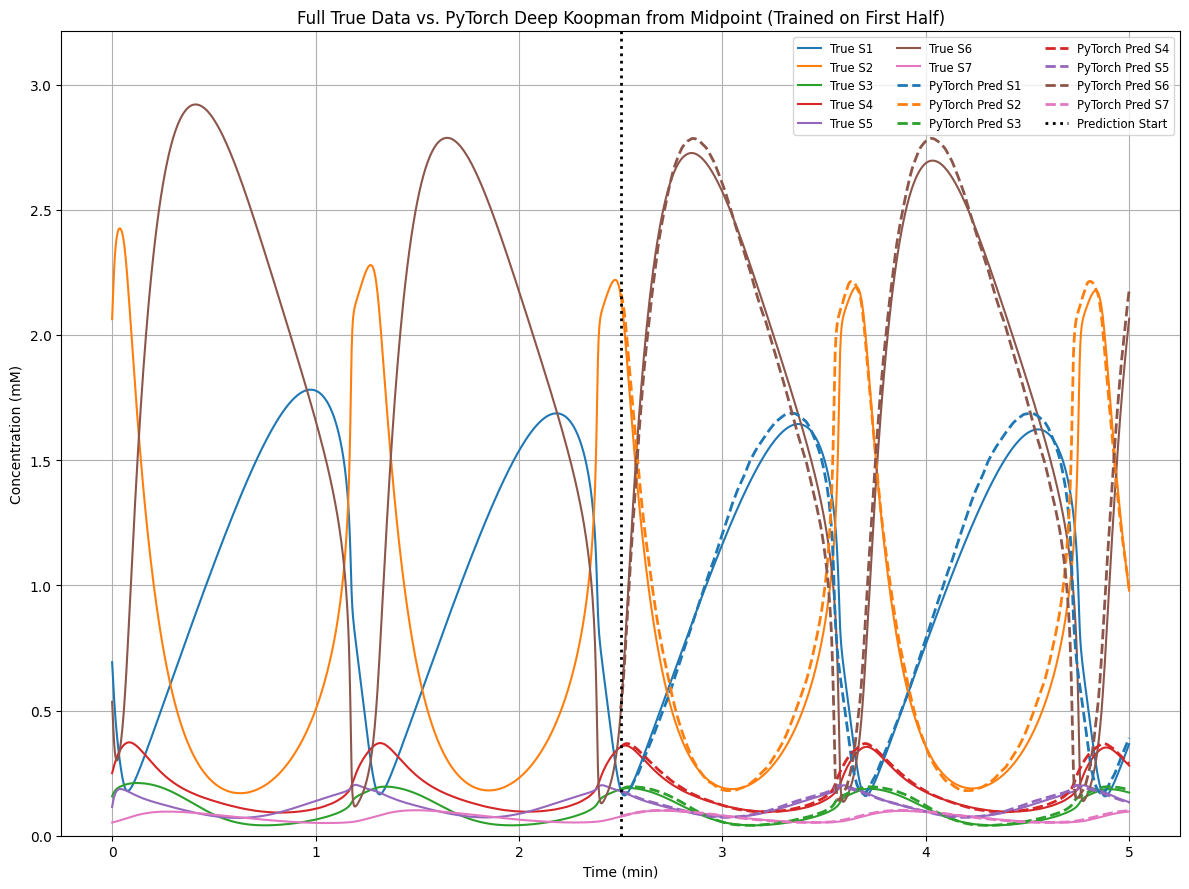

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time

from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# The neural network is extremely sensitive to how it is initialized and may not always give great results
# A seed which demonstrates that neural networks can perform well
torch.manual_seed(7774205792100312295)
# print(torch.seed())

TRAIN_FRACTION = 0.5

INPUT_SIZE = 7
ENCODED_SIZE = 200
ENCODER_HIDDEN_LAYERS = [50, 100, 150] 
DECODER_HIDDEN_LAYERS = [150, 100, 50] 
ACTIVATION_FUNC = nn.ReLU # nn.ReLU, nn.ELU, nn.Tanh etc

NUM_EPOCHS = 800       
BATCH_SIZE = 64    
LEARNING_RATE = 1e-3  
WEIGHT_DECAY = 1e-5 # L2 regularization for Adam optimizer 

LOSS_WEIGHT_LINEAR = 1.00    # Linearity in latent space: psi(x_kp1) vs K*psi(x_k)
LOSS_WEIGHT_PRED = 1.00     # Prediction in original space: dec(K*enc(x_k)) vs x_kp1

N_SPECIES_TO_PLOT = 7

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


class Encoder(nn.Module):
    def __init__(self, input_dim, encoded_dim, hidden_layers, activation):
        super().__init__()
        layers = []
        last_dim = input_dim
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(last_dim, hidden_dim))
            layers.append(activation())
            last_dim = hidden_dim
        layers.append(nn.Linear(last_dim, encoded_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

class Decoder(nn.Module):
    def __init__(self, encoded_dim, output_dim, hidden_layers, activation):
        super().__init__()
        layers = []
        last_dim = encoded_dim
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(last_dim, hidden_dim))
            layers.append(activation())
            last_dim = hidden_dim
        layers.append(nn.Linear(last_dim, output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, z):
        return self.net(z)

class DeepKoopman(nn.Module):
    def __init__(self, input_dim, encoded_dim, encoder_hidden, decoder_hidden, activation):
        super().__init__()
        self.encoder = Encoder(input_dim, encoded_dim, encoder_hidden, activation)
        self.decoder = Decoder(encoded_dim, input_dim, decoder_hidden, activation)
        self.koopman_linear = nn.Linear(encoded_dim, encoded_dim, bias=False)

    def forward(self, x_k, x_kp1):
        z_k = self.encoder(x_k)     # psi(x_k)
        z_kp1 = self.encoder(x_kp1) # psi(x_{k+1})

        z_kp1_pred_lin = self.koopman_linear(z_k) # K * psi(x_k)

        x_k_recon = self.decoder(z_k)             # dec(psi(x_k))
        x_kp1_pred = self.decoder(z_kp1_pred_lin) # dec(K * psi(x_k))

        return z_k, z_kp1, z_kp1_pred_lin, x_k_recon, x_kp1_pred


def train_model(model, dataloader, num_epochs, lr, weight_decay, loss_weights, device):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    mse_loss = nn.MSELoss()
    stats = {'epoch': [], 'total_loss': [], 'recon_loss': [], 'linear_loss': [], 'pred_loss': []}

    print(f"\n--- Starting Training ---")
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        epoch_total_loss = 0.0
        epoch_recon_loss = 0.0
        epoch_linear_loss = 0.0
        epoch_pred_loss = 0.0
        num_batches = 0

        for x_k_batch, x_kp1_batch in dataloader:
            x_k_batch = x_k_batch.to(device)
            x_kp1_batch = x_kp1_batch.to(device)

            optimizer.zero_grad()

            z_k, z_kp1, z_kp1_pred_lin, x_k_recon, x_kp1_pred = model(x_k_batch, x_kp1_batch)

            loss_linear = mse_loss(z_kp1, z_kp1_pred_lin) # How linear is dynamics in z
            loss_pred = mse_loss(x_kp1_pred, x_kp1_batch) # How well we predict next step x

            total_loss = (loss_weights['linear'] * loss_linear + loss_weights['pred'] * loss_pred)

            total_loss.backward()
            optimizer.step()

            epoch_total_loss += total_loss.item()
            epoch_linear_loss += loss_linear.item()
            epoch_pred_loss += loss_pred.item()
            num_batches += 1

        avg_total_loss = epoch_total_loss / num_batches
        avg_linear_loss = epoch_linear_loss / num_batches
        avg_pred_loss = epoch_pred_loss / num_batches

        stats['epoch'].append(epoch)
        stats['total_loss'].append(avg_total_loss)
        stats['linear_loss'].append(avg_linear_loss)
        stats['pred_loss'].append(avg_pred_loss)

        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_total_loss:.6f} "
                  f"(Linear: {avg_linear_loss:.6f}, Pred: {avg_pred_loss:.6f})")

    end_time = time.time()
    print(f"--- Training Finished ({end_time - start_time:.2f} sec) ---")
    return stats


def predict_trajectory(model, x0_scaled, n_steps, device):
    model.eval() 
    model.to(device)
    
    predicted_traj_scaled_list = [x0_scaled.copy()]
    
    current_x_scaled_tensor = torch.from_numpy(x0_scaled).float().unsqueeze(0).to(device) # (1, input_dim)

    with torch.no_grad():
        for _ in range(n_steps):
            # Encoding current state x_k to get z_k
            z_k = model.encoder(current_x_scaled_tensor)
            # Koopman operator in latent space: z_{k+1} = A * z_k
            z_kp1_pred_latent = model.koopman_linear(z_k)
            # Decoding z_{k+1} to get predicted x_{k+1}
            x_kp1_pred_scaled_tensor = model.decoder(z_kp1_pred_latent)
            # Storing the predicted x in original (scaled) space
            predicted_traj_scaled_list.append(x_kp1_pred_scaled_tensor.squeeze(0).cpu().numpy())
            # Updating current_x_scaled_tensor for the next iteration
            # The decoded output becomes the input for the next step
            current_x_scaled_tensor = x_kp1_pred_scaled_tensor 

    return np.array(predicted_traj_scaled_list) # Shape (n_steps + 1, input_dim)


time_unit = 'min'

print(f"Using simulation data shape: {time_series_data.shape}")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(time_series_data)

split_index = int(num_points * TRAIN_FRACTION)
train_data_scaled = scaled_data[:split_index, :]
test_data_scaled = scaled_data[split_index:, :]

X_train_k = train_data_scaled[:-1, :]
X_train_kp1 = train_data_scaled[1:, :]

train_dataset = TensorDataset(torch.from_numpy(X_train_k).float(), torch.from_numpy(X_train_kp1).float())
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
print(f"Created DataLoader: Train batches = {len(train_dataloader)}")

print(f"\n--- Model Configuration ---")
print(f"  Input Size: {INPUT_SIZE}")
print(f"  Encoded Size: {ENCODED_SIZE}")
print(f"  Encoder Hidden: {ENCODER_HIDDEN_LAYERS}")
print(f"  Decoder Hidden: {DECODER_HIDDEN_LAYERS}")
print(f"  Activation: {ACTIVATION_FUNC.__name__}")

model = DeepKoopman(
    input_dim=INPUT_SIZE,
    encoded_dim=ENCODED_SIZE,
    encoder_hidden=ENCODER_HIDDEN_LAYERS,
    decoder_hidden=DECODER_HIDDEN_LAYERS,
    activation=ACTIVATION_FUNC
)

loss_weights = {
    'linear': LOSS_WEIGHT_LINEAR,
    'pred': LOSS_WEIGHT_PRED
}
training_stats = train_model(model, train_dataloader, NUM_EPOCHS, LEARNING_RATE, WEIGHT_DECAY, loss_weights, device)

x0_predict_midpoint_scaled = test_data_scaled[0, :]
n_test_prediction_steps = test_data_scaled.shape[0] - 1

x_predicted_scaled = predict_trajectory(model, x0_predict_midpoint_scaled, n_test_prediction_steps, device)

x_pred_plot_data = scaler.inverse_transform(x_predicted_scaled)
print(f"Prediction complete and inverse transformed. Shape: {x_pred_plot_data.shape}") # Shape (n_steps+1, features)

t_eval_plot = np.linspace(0, T_final, num_points)
num_pred_points_plot = x_pred_plot_data.shape[0]
t_pred_plot_axis = np.linspace(T_final / 2, T_final, num_pred_points_plot) 

plt.figure(figsize=(12, 9))
N_SPECIES_TO_PLOT = min(time_series_data.shape[1], N_SPECIES_TO_PLOT)

for i in range(N_SPECIES_TO_PLOT):
    plt.plot(t_eval_plot, time_series_data[:, i], '-', linewidth=1.5, color=f'C{i}', label=f'True S{i+1}')

for i in range(N_SPECIES_TO_PLOT):
    plt.plot(t_pred_plot_axis, x_pred_plot_data[:, i], '--', linewidth=2.0, color=f'C{i}', label=f'PyTorch Pred S{i+1}')

plt.axvline(T_final / 2, color='k', linestyle=':', linewidth=2, label='Prediction Start')
plt.xlabel(f'Time ({time_unit})')
plt.ylabel('Concentration (mM)')
basis_desc = f"PyTorch (Enc Dim={ENCODED_SIZE})"
plt.title(f'Full True Data vs. PyTorch Deep Koopman from Midpoint (Trained on First Half)')
plt.legend(fontsize='small', ncol=3)
plt.grid(True)
min_val = np.min(time_series_data)
max_val = np.max(time_series_data)
plt.ylim(bottom=min(0, min_val*1.1), top=max_val*1.1)
plt.tight_layout()
plt.show()